### Treść zadania

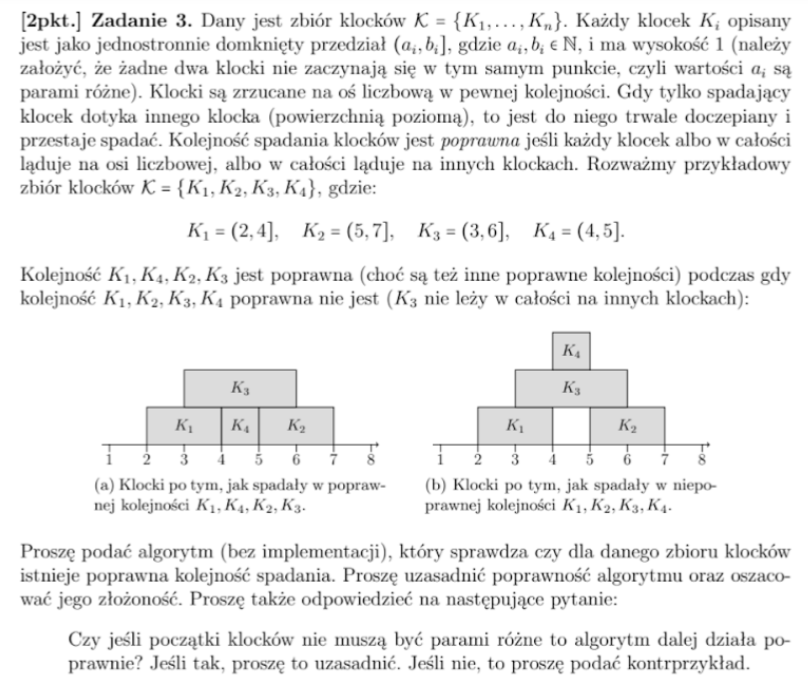

# Sposób I

### Złożoność

###### Obliczeniowa:
$ O(n^2) $  - na razie, jak znajdę pomysł na utrzymywanie struktury posortowanej, będzie $ O(n \cdot log(n)) $ TO IMPROVE
###### Pamięciowa:
$ O(n) $

### Implementacja

In [1]:
class Brick:
    def __init__(self, coord, end=None):
        self.coord = coord
        self.end  = end
        self.next = None
        self.prev = None
        
    def __str__(self):
        return f"({self.coord}, {self.end.coord}]" if self.end else "end"

    
def print_bricks(head, tail):
    curr = head.next
    while curr is not tail:
        if curr.end:
            next_ = f"(next: ({curr.end.next.coord}, {curr.end.next.end.coord}])" if curr.end.next.end else ""
            print(f'{curr} {next_} -> ', end='')
        curr = curr.next
    print()
    
    
def print_ll(head, tail):
    curr = head.next
    while curr is not tail:
        print(curr.coord, curr, end=', ')
        curr = curr.next
    print()
    
        
def bricks_ll(K):
    n = len(K)
    B = [None] * (2 * n)
    for i in range(n):
        end = Brick(K[i][1])
        begin = Brick(K[i][0], end)
        B[2 * i] = begin
        B[2 * i + 1] = end
        
    # Sort all bricks by their coordinates
    # (and by ends in such a way that if there is the same
    # baginning coordinate and the same end coordinate, the end
    # one will be before the beginning)
    B.sort(key=lambda b: (b.coord, bool(b.end)))
    
    # Link bircks one to another
    for i in range(2 * n - 1):
        B[i].next = B[i + 1]
        B[i + 1].prev = B[i]
        
    # Create sentinel bricks
    head = Brick(None)
    tail = Brick(None)
    head.next = B[0]
    B[0].prev = head
    tail.prev = B[2 * n - 1]
    B[2 * n - 1].next = tail
    
    return head, tail


def remove_brick(brick):
    # Remove the beginning coordinate
    brick.prev.next = brick.next
    brick.next.prev = brick.prev
    brick.next = brick.prev = None
    # Remove the end coordinate
    end_brick = brick.end
    end_brick.prev.next = end_brick.next
    end_brick.next.prev = end_brick.prev
    end_brick.next = end_brick.prev = None
    
    
def can_fall(brick, banned):  # TO IMPROVE (BINARY SEARCH, KEEP BANNED SORTED)
    for coord in banned:
        # If a banned coordinate is somewehere inside the falling brick
        if brick.coord < banned < brick.end.coord:
            return False
    return True

    
def bricks(K):
    head, tail = bricks_ll(K)  # Create a kind of a skiplist
    banned_coords = []  # TO IMPROVE
    
    # Loop till there are some bricks remaining
    while head.next is not tail:
        curr = head.next
        # Check if we can make the next layer of bricks
        while True:
            # Check if the current brick can fall
            if not can_fall(curr, banned_coords):
                return False
            # Store the next brick which will be the next
            # next in order to fall
            next_brick = curr.end.next
            # Remove the current brick from the linkedlist
            remove_brick(curr)
            # Go to the next brick
            curr = next_brick
            # Check is there are still some next bricks
            if next_brick is tail: break
            # Check if there will be a gap when the next brick falls
            if next_brick.coord > curr.end.coord:
                banned_coords.append(next_brick.coord)
                banned_coords.append(next_brick.coord)
    return True

###### Kilka testów

In [2]:
K = [(2, 4), (5, 7), (3, 6), (4, 5)]

print(bricks(K))

True
